# 📊 Menú principal 

## Índice de Ejemplos

1. [Ejemplo 7: Relación entre varianzas](#ejemplo-7)
2. [Ejemplo 8: Valores de la distribución F](#ejemplo-8)
3. [Ejemplo 9: Función de densidad y distribución F](#ejemplo-9)



## Ejemplo 7: Relacion entre varianzas

🔗 Navegacion:  
➡️ [Ir a Ejemplo 8](#ejemplo-8-valores-de-la-distribucion-f) | ➡️ [Ir a Ejemplo 9](#ejemplo-9-funcion-de-densidad-y-distribucion-f) | 🏠 [Menu principal](./MenuDistribucionF.ipynb)

En una empresa se tienen dos tornos de diferente antiguedad, lo que hace pensar que las varianzas no son iguales.  
¿Cuál es la probabilidad de que la relación entre las varianzas sea igual a 3?  
Se sabe que los grados de libertad son iguales a 10.

Fuente Bibliografica del ejercicio: https://www.youtube.com/watch?v=uLfQ0kEbefk



f(x=3) con v1=10 y v2=10 ≈ 0.04867


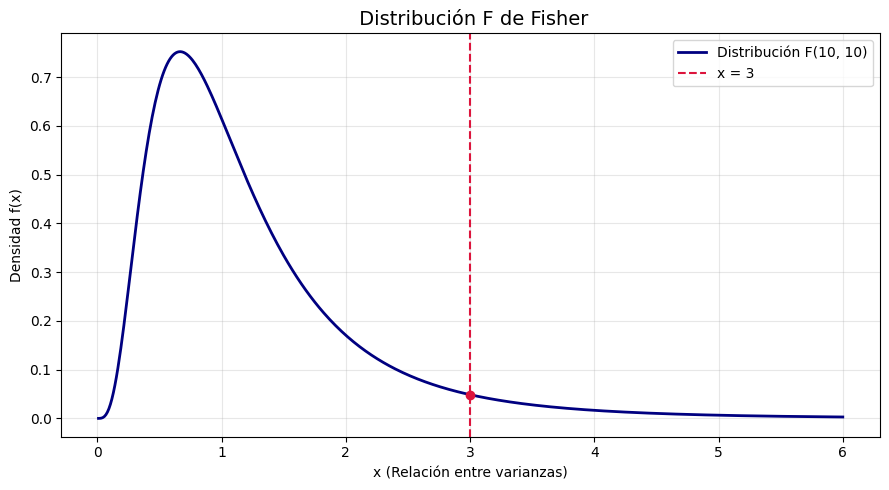

In [4]:
# 📚 Ejemplo: Cálculo y gráfica de la función de densidad F de Fisher

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# -----------------------------------
# 🎯 Parámetros del ejemplo
# -----------------------------------
relacion_varianzas = 3     # Valor observado (x)
v1 = 10                    # Grados de libertad del numerador
v2 = 10                    # Grados de libertad del denominador

# -----------------------------------
# 🧮 Cálculo de la función de densidad
# -----------------------------------
densidad = f.pdf(relacion_varianzas, dfn=v1, dfd=v2)

# Mostrar el valor calculado
print(f"f(x={relacion_varianzas}) con v1={v1} y v2={v2} ≈ {densidad:.5f}")

# -----------------------------------
# 📈 Graficar la distribución F
# -----------------------------------
x_vals = np.linspace(0.01, 6, 500)
y_vals = f.pdf(x_vals, dfn=v1, dfd=v2)

plt.figure(figsize=(9, 5))
plt.plot(x_vals, y_vals, label=f'Distribución F({v1}, {v2})', color='navy', lw=2)
plt.axvline(relacion_varianzas, color='crimson', linestyle='--', label=f'x = {relacion_varianzas}')
plt.scatter([relacion_varianzas], [densidad], color='crimson', zorder=5)

plt.title(" Distribución F de Fisher", fontsize=14)
plt.xlabel("x (Relación entre varianzas)")
plt.ylabel("Densidad f(x)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Ejemplo 8: Valores de la distribucion f

🔗 Navegacion:  
⬅️ [Ir a Ejemplo 7](#ejemplo-7-relacion-entre-varianzas) | ➡️ [Ir a Ejemplo 9](#ejemplo-9-funcion-de-densidad-y-distribucion-f) | 🏠 [Menu principal](./MenuDistribucionF.ipynb)

Calcular los siguientes valores de una distribución F de Fisher:

- A: Area izquierda con 0.95 con 15 y 10 grados de libertad  
- B: Area izquierda con 0.99 con 20 y 25 grados de libertad  

**Solucion b)**  
Sea *n* el valor a buscar en las tablas de Fisher tal que  
\\( P(X \\leq n) = 0.99 \\)

Fuente Bibliografica del ejercicio: https://www.youtube.com/watch?v=uLfQ0kEbefk




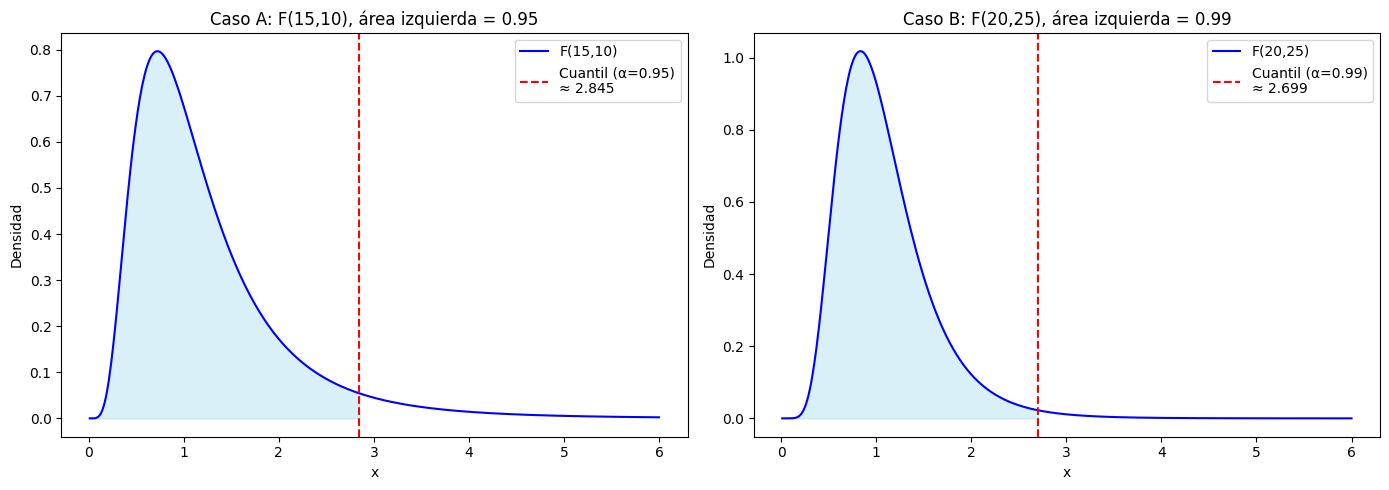

Caso A) Cuantil F(15,10) con área izquierda 0.95 = 2.8450
Caso B) Cuantil F(20,25) con área izquierda 0.99 = 2.6993


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Parámetros para los dos casos
params = [
    {"gl1": 15, "gl2": 10, "alpha": 0.95, "label": "Caso A"},
    {"gl1": 20, "gl2": 25, "alpha": 0.99, "label": "Caso B"}
]

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

for i, p in enumerate(params):
    gl1 = p["gl1"]
    gl2 = p["gl2"]
    alpha = p["alpha"]
    label = p["label"]

    # Eje x
    x = np.linspace(0.01, 6, 500)

    # Densidad
    pdf = f.pdf(x, gl1, gl2)

    # Valor crítico (cuantil)
    cuantil = f.ppf(alpha, gl1, gl2)

    # Gráfica de densidad
    axs[i].plot(x, pdf, label=f"F({gl1},{gl2})", color="blue")
    axs[i].axvline(cuantil, color='red', linestyle='--', label=f'Cuantil (α={alpha})\n≈ {cuantil:.3f}')
    axs[i].fill_between(x, 0, pdf, where=(x <= cuantil), color='skyblue', alpha=0.3)
    
    # Etiquetas y título
    axs[i].set_title(f"{label}: F({gl1},{gl2}), área izquierda = {alpha}")
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("Densidad")
    axs[i].legend()

plt.tight_layout()
plt.show()

# Imprimir los valores críticos en consola
for p in params:
    cuantil = f.ppf(p["alpha"], p["gl1"], p["gl2"])
    print(f"{p['label']}) Cuantil F({p['gl1']},{p['gl2']}) con área izquierda {p['alpha']} = {cuantil:.4f}")


## Ejemplo 9: Función de densidad y distribución F

🔗 Navegación:  
⬅️ [Ir a Ejemplo 7](#ejemplo-7-relacion-entre-varianzas) | ⬅️ [Ir a Ejemplo 8](#ejemplo-8-valores-de-la-distribucion-f) | 🏠 [Menú principal](./MenuDistribucionF.ipynb)

9.4.- Dibujar la función de densidad y la función de distribución de una  
variable aleatoria F(5,10). Calcular \\( F_{5,10;0.05} \\).

Fuente Bibliográfica del ejercicio: DISTRIBUCIONES DE PROBABILIDAD DISCRETAS Y CONTINUAS CAPÍTULO 9  
https://ocw.ehu.eus/file.php/120/software_mate/ejercicios-resueltos/ejercicios-resueltos-tema-9.pdf


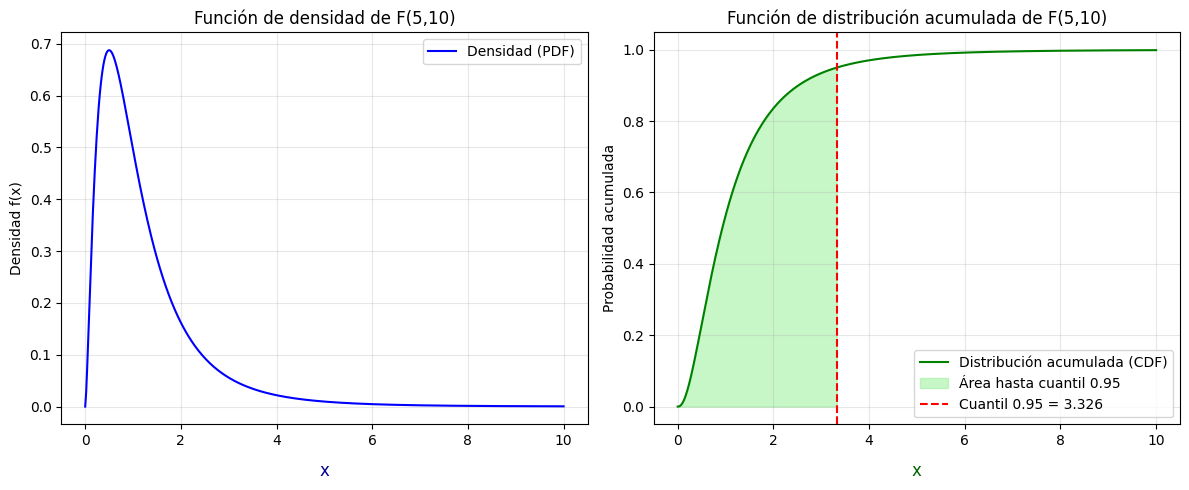

Cuantil 0.95 de la distribución F(5,10): 3.32583


In [6]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt

# Valores para la distribución F con grados de libertad (5, 10)
v1, v2 = 5, 10
x = np.linspace(0, 10, 500)

# Función de densidad (PDF)
pdf_vals = f.pdf(x, v1, v2)

# Función acumulada (CDF)
cdf_vals = f.cdf(x, v1, v2)

# Cuantil 95%
cuantil_95 = f.ppf(0.95, v1, v2)

# Crear figura y dos subplots
plt.figure(figsize=(12, 5))

# Gráfica PDF
plt.subplot(1, 2, 1)
plt.plot(x, pdf_vals, label='Densidad (PDF)', color='blue')
plt.title('Función de densidad de F(5,10)')
plt.xlabel('x', fontsize=12, color='darkblue', labelpad=10, loc='center')
plt.ylabel('Densidad f(x)')
plt.grid(alpha=0.3)
plt.legend()

# Gráfica CDF con sombreado hasta cuantil 0.95
plt.subplot(1, 2, 2)
plt.plot(x, cdf_vals, label='Distribución acumulada (CDF)', color='green')
# Área sombreada hasta el cuantil 0.95
x_fill = np.linspace(0, cuantil_95, 300)
plt.fill_between(x_fill, 0, f.cdf(x_fill, v1, v2), color='lightgreen', alpha=0.5, label='Área hasta cuantil 0.95')
plt.axvline(cuantil_95, color='red', linestyle='--', label=f'Cuantil 0.95 = {cuantil_95:.3f}')
plt.title('Función de distribución acumulada de F(5,10)')
plt.xlabel('x', fontsize=12, color='darkgreen', labelpad=10, loc='center')
plt.ylabel('Probabilidad acumulada')
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Mostrar el valor del cuantil 0.95 en consola
print(f"Cuantil 0.95 de la distribución F(5,10): {cuantil_95:.5f}")
